# Homework 2
 Scott Karr <br>
 DATA 620 - Web Analytics <br>
 Fall - 2019 <br>
 
 http://networkrepository.com/primary-school-proximity.php <br>
 https://stackoverflow.com/questions/19915266/drawing-a-graph-with-networkx-on-a-basemap
 https://github.com/networkx/networkx/blob/master/networkx/classes/function.py
 https://stackoverflow.com/questions/31575634/problems-printing-weight-in-a-networkx-graph
***

This homework PRIMARY-SCHOOL-PROXIMITY network data from NETWORK REPOSITORY.  The dataset is stored in file primary-school-proximity.edges.csv and contains primary school measurements associated zipcodes in the state of Georgia.

+ Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.  

+  Use a visualization tool of your choice (NetworkX or some other tool) to display information. <br><br>

+  Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

Name: 
Type: Graph
Number of nodes: 242
Number of edges: 8317
Average degree:  68.7355
diameter:  3
density:  0.28520969788416034


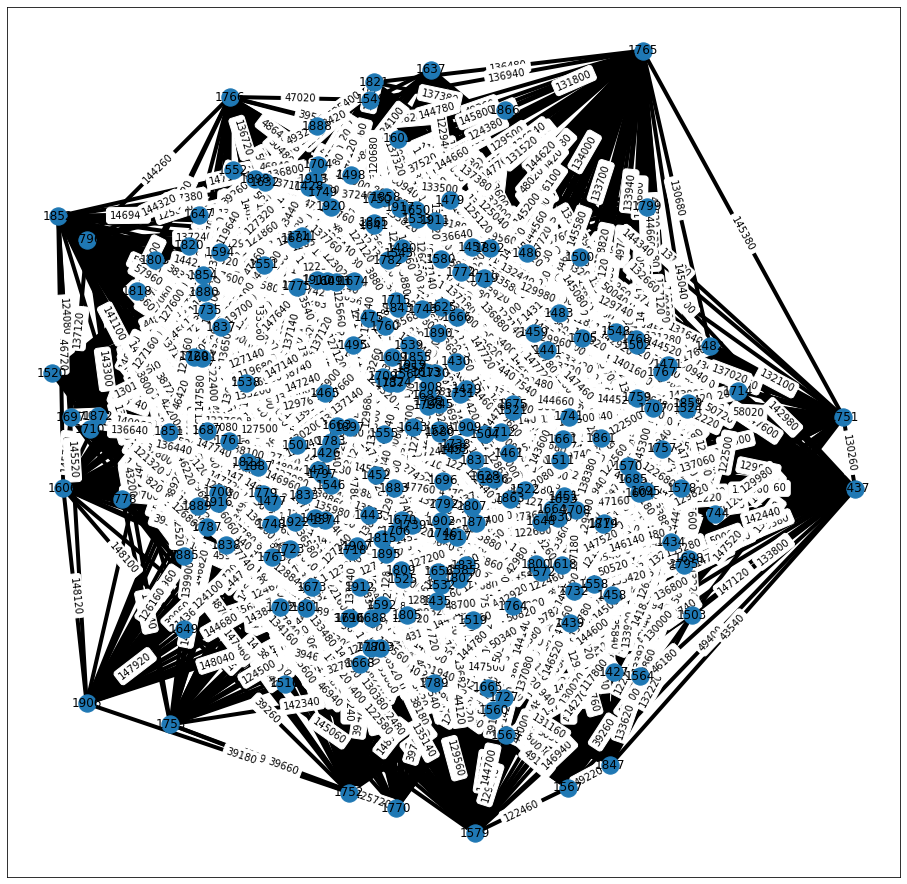

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
#import collections



def nodes(G):
    """Returns an iterator over the graph nodes."""
    return G.nodes()


def edges(G, nbunch=None):
    """Returns an edge view of edges incident to nodes in nbunch.
    Return all edges if nbunch is unspecified or nbunch=None.
    For digraphs, edges=out_edges
    """
    return G.edges(nbunch)


def degree(G, nbunch=None, weight=None):
    """Returns a degree view of single node or of nbunch of nodes.
    If nbunch is omitted, then return degrees of *all* nodes.
    """
    return G.degree(nbunch, weight)


def neighbors(G, n):
    """Returns a list of nodes connected to node n. """
    return G.neighbors(n)


def number_of_nodes(G):
    """Returns the number of nodes in the graph."""
    return G.number_of_nodes()


def number_of_edges(G):
    """Returns the number of edges in the graph. """
    return G.number_of_edges()


def density(G):
    r"""Returns the density of a graph.
    The density for undirected graphs is
    .. math::
       d = \frac{2m}{n(n-1)},
    and for directed graphs is
    .. math::
       d = \frac{m}{n(n-1)},
    where `n` is the number of nodes and `m`  is the number of edges in `G`.
    Notes
    -----
    The density is 0 for a graph without edges and 1 for a complete graph.
    The density of multigraphs can be higher than 1.
    Self loops are counted in the total number of edges so graphs with self
    loops can have density higher than 1.
    """
    n = number_of_nodes(G)
    m = number_of_edges(G)
    if m == 0 or n <= 1:
        return 0
    d = m / (n * (n - 1))
    if not G.is_directed():
        d *= 2
    return d


def degree_histogram(G):
    """Returns a list of the frequency of each degree value.
    Parameters
    ----------
    G : Networkx graph
       A graph
    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.
    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    counts = collections.Counter(d for n, d in G.degree())
    return [counts.get(i, 0) for i in range(max(counts) + 1)]


def is_directed(G):
    """ Return True if graph is directed."""
    return G.is_directed()

def info(G, n=None):
    """Print short summary of information for the graph G or the node n.
    Parameters
    ----------
    G : Networkx graph
       A graph
    n : node (any hashable)
       A node in the graph G
    """
    info = ''  # append this all to a string
    if n is None:
        info += "Name: %s\n" % G.name
        type_name = [type(G).__name__]
        info += "Type: %s\n" % ",".join(type_name)
        info += "Number of nodes: %d\n" % G.number_of_nodes()
        info += "Number of edges: %d\n" % G.number_of_edges()
        nnodes = G.number_of_nodes()
        if len(G) > 0:
            if G.is_directed():
                deg = sum(d for n, d in G.in_degree()) / float(nnodes)
                info += "Average in degree: %8.4f\n" % deg
                deg = sum(d for n, d in G.out_degree()) / float(nnodes)
                info += "Average out degree: %8.4f" % deg
            else:
                s = sum(dict(G.degree()).values())
                info += "Average degree: %8.4f" % (float(s) / float(nnodes))

    else:
        if n not in G:
            raise nx.NetworkXError("node %s not in graph" % (n,))
        info += "Node % s has the following properties:\n" % n
        info += "Degree: %d\n" % G.degree(n)
        info += "Neighbors: "
        info += ' '.join(str(nbr) for nbr in G.neighbors(n))
    return info

def is_weighted(G, edge=None, weight='weight'):
    """Returns True if `G` has weighted edges.
    Parameters
    ----------
    G : graph
        A NetworkX graph.
    edge : tuple, optional
        A 2-tuple specifying the only edge in `G` that will be tested. If
        None, then every edge in `G` is tested.
    weight: string, optional
        The attribute name used to query for edge weights.
    Returns
    -------
    bool
        A boolean signifying if `G`, or the specified edge, is weighted.
    Raises
    ------
    NetworkXError
        If the specified edge does not exist.
    Examples
    --------
    >>> G = nx.path_graph(4)
    >>> nx.is_weighted(G)
    False
    >>> nx.is_weighted(G, (2, 3))
    False
    >>> G = nx.DiGraph()
    >>> G.add_edge(1, 2, weight=1)
    >>> nx.is_weighted(G)
    True
    """
    if edge is not None:
        data = G.get_edge_data(*edge)
        if data is None:
            msg = 'Edge {!r} does not exist.'.format(edge)
            raise nx.NetworkXError(msg)
        return weight in data

    if is_empty(G):
        # Special handling required since: all([]) == True
        return False

    return all(weight in data for u, v, data in G.edges(data=True))

def plot_graph(G):
    
    # larger figure size
    plt.figure(4,figsize=(16,16)) 
    pos = nx.spring_layout(G)
    new_labels = dict(map(lambda x:((x[0],x[1]), str(x[2]['weight'] if x[2]['weight'] > 3 else "") ), G.edges(data = True)))
    #
    nx.draw_networkx(g, pos, edges=edges, with_labels=True);
    nx.draw_networkx_edges(g,pos,width=4, edge_color='black', arrows=False)
    nx.draw_networkx_edge_labels(g, pos=pos, edge_labels = new_labels)    

Data = open('primary-school-proximity.edges.csv', "r")

Graphtype = nx.Graph()
g = nx.parse_edgelist(Data,delimiter=',',create_using=Graphtype,nodetype=int, data=(('weight', int),))

print(nx.info(g))
print('diameter: ', nx.diameter(g, e=None, usebounds=False))
print('density: ', density(g))

plot_graph(g)
plt.show()

@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={http://networkrepository.com},
     year={2015}
}

This is a fairly large network and not much can be inferred from it. There are multiple sub-networks within due to there not being ties between everything. We will isolate the largest sub-network in the group and move forward with our binary projection of the network into donors and committees.